### Exercise
Do your work for this exercise in a notebook named `explore.ipynb`. Use the techniques in the lesson to explore the **store item demand** dataset and the **opsd** dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

**Note: When resampling data, use a `mean()` aggregation method.**

### Store Item Demand
Load your store item demand data using your acquire and/or prepare functions.

Only use your train data set to perform the following tasks:

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (18,5)
plt.rcParams["font.size"] = 20

In [2]:
import prepare

df = pd.read_csv('merged_df.csv', index_col='Unnamed: 0')
df = prepare.prep_sales(df)
df.head()

,sale_amount,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,January,Tuesday,10.92
2013-01-02,11.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,January,Wednesday,9.24
2013-01-03,14.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,January,Thursday,11.76
2013-01-04,13.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,January,Friday,10.92
2013-01-05,10.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,January,Saturday,8.40


1. Using a human-based approach, split your dataset into train and test sets.
2. Visualize your train-test split.

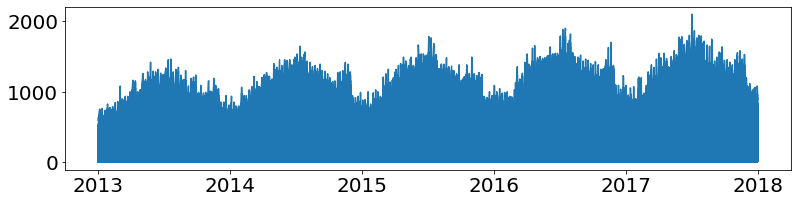

In [28]:
plt.plot(df.index, df.sales_total)

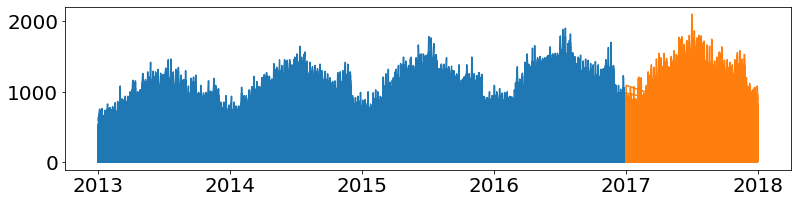

In [29]:
train = df[:'2016'] # includes 2016
test = df['2017'] 

y = train.sales_total

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

3. Resample your data and visualize it.

In [5]:
train['month'] = train.index.strftime('%m-%b')
train.head()

,sale_amount,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,01-Jan,Tuesday,10.92
2013-01-02,11.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,01-Jan,Wednesday,9.24
2013-01-03,14.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,01-Jan,Thursday,11.76
2013-01-04,13.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,01-Jan,Friday,10.92
2013-01-05,10.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,01-Jan,Saturday,8.40


<AxesSubplot:title={'center':'Daily average'}, xlabel='sale_date'>

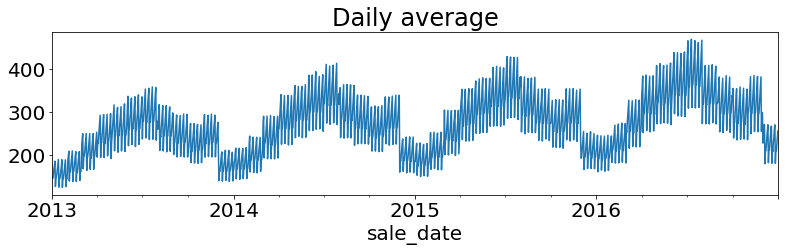

In [30]:
train.sales_total.resample('D').mean().plot(title='Daily average')

4. Creating a rolling (moving) average of your data and visualize it.

<AxesSubplot:xlabel='sale_date'>

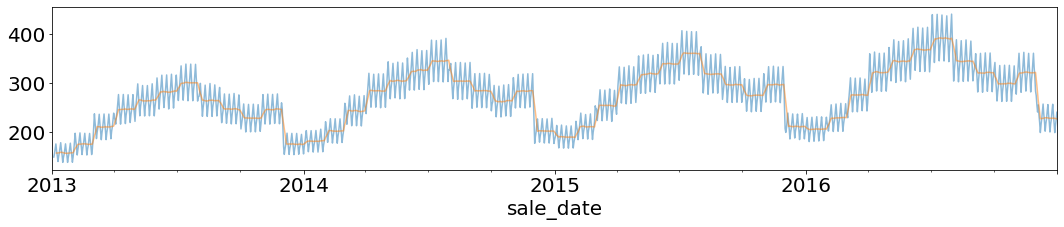

In [70]:
train.sales_total.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
train.sales_total.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='7 day')

5. Plot the difference in sales from one day to the next.

<AxesSubplot:xlabel='sale_date'>

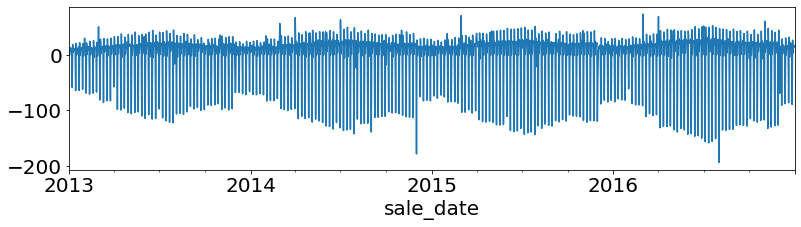

In [33]:
y.resample('D').mean().diff().plot()

6. Plot the % difference in sales from one day to the next.

<AxesSubplot:title={'center':'Average day to day % Change in Temperature'}, xlabel='sale_date'>

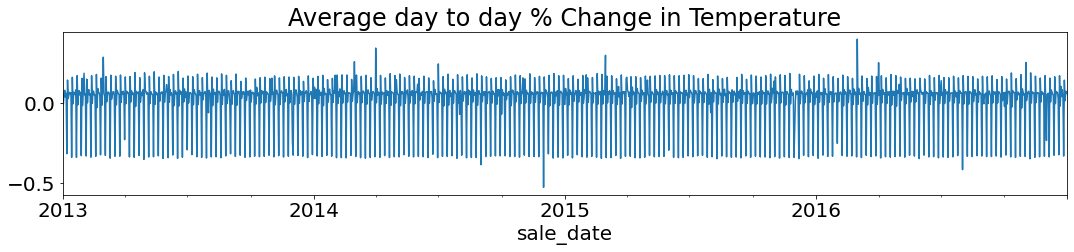

In [40]:
(y.resample('D').mean().diff() / y.resample('D').mean().shift()).plot(title='Average day to day % Change in Temperature')

7. Plot the % difference in sales from one month to the next.

<AxesSubplot:title={'center':'Average Month-to-Month % Change in Temperature'}, xlabel='sale_date'>

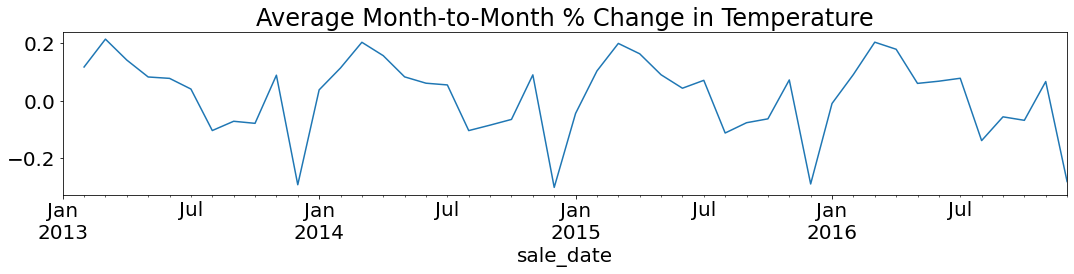

In [41]:
(y.resample('M').mean().diff() / y.resample('M').mean().shift()).plot(title='Average Month-to-Month % Change in Temperature')

8. Visualize an autocorrelation plot on a weekly resampling.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

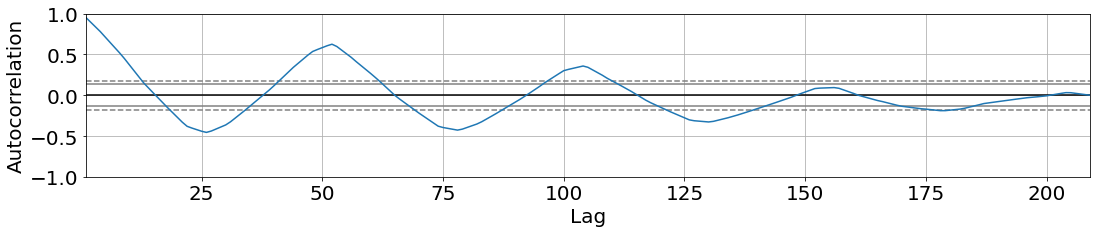

In [42]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

9. Visualize a seasonal decomposition plot on a weekly resampling.

In [45]:
result = sm.tsa.seasonal_decompose(y.resample('W').mean())
result

In [46]:
result.seasonal

sale_date
2013-01-06   -77.434789
2013-01-13   -79.225757
2013-01-20   -79.904284
2013-01-27   -80.259357
2013-02-03   -77.352692
                ...    
2016-12-04   -69.599576
2016-12-11   -73.100878
2016-12-18   -73.857448
2016-12-25   -74.634547
2017-01-01   -77.434789
Freq: W-SUN, Name: seasonal, Length: 209, dtype: float64

In [50]:
decomposition = pd.DataFrame({'seasonal': result.seasonal,})
decomposition.head()

,seasonal
sale_date,
2013-01-06,-77.434789
2013-01-13,-79.225757
2013-01-20,-79.904284
2013-01-27,-80.259357
2013-02-03,-77.352692


<AxesSubplot:xlabel='sale_date'>

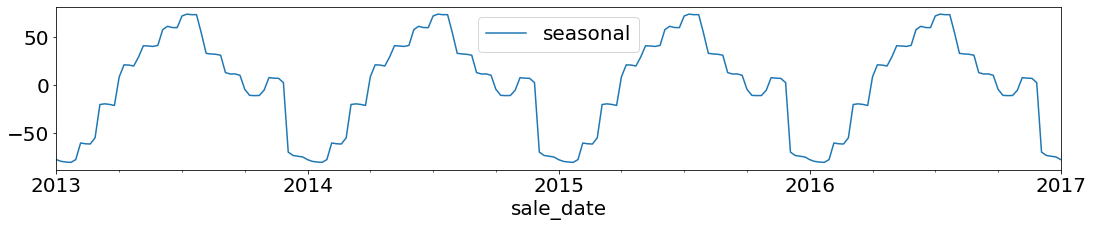

In [52]:
decomposition.plot()

### OPS data
Load your OPS data using your acquire and/or prepare functions.
1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test. 

In [53]:
power = pd.read_csv('power.csv', index_col='Unnamed: 0')
power = prepare.prep_power(power)
power.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [58]:
train_power = power[:'2013'] # includes 2013
test_power = power['2014':] 

Only use the train data set to perform the following tasks:

2. Visualize your train-test split.

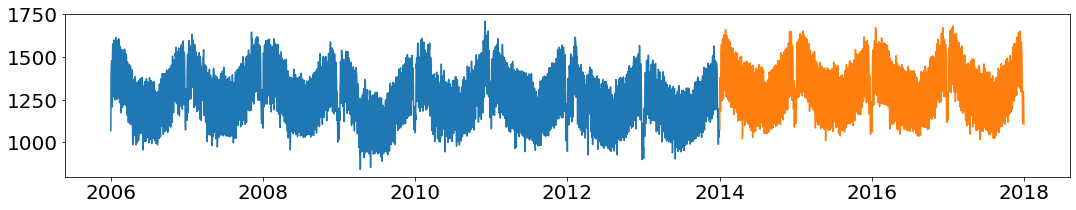

In [59]:
plt.plot(train_power.index, train_power.Consumption)
plt.plot(test_power.index, test_power.Consumption)

3. Plot the consumption, wind, and solar data on the same chart.

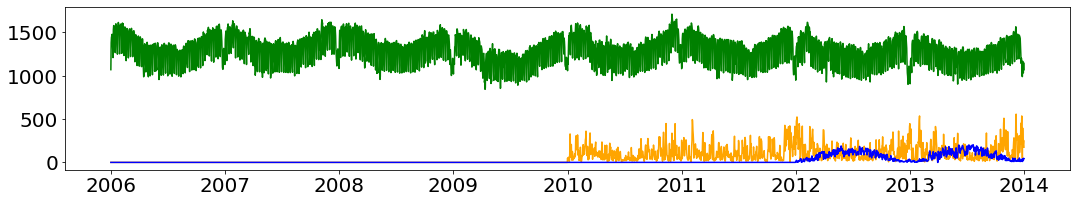

In [68]:
plt.plot(train_power.index, train_power.Consumption, color = 'green')
plt.plot(train_power.index, train_power.Wind, color = 'orange')
plt.plot(train_power.index, train_power.Solar, color = 'blue')

4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.

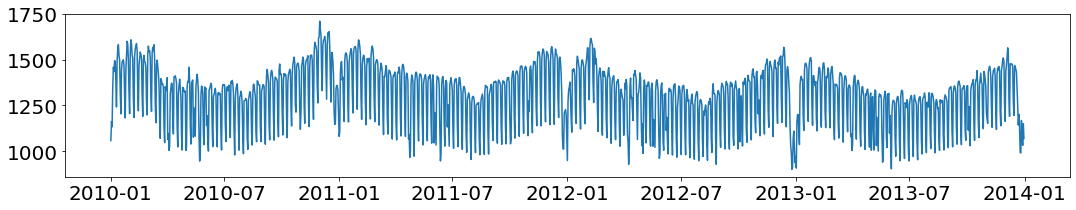

In [89]:
plt.plot(train_power['2010':].index, train_power['2010':].Consumption)

5. Resample the consumption data to monthly and plot it.

<AxesSubplot:xlabel='Date'>

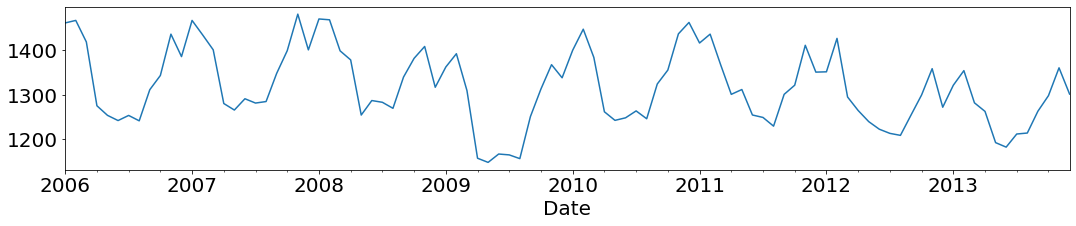

In [91]:
train_power.Consumption.resample('M').mean().plot()

6. Resample the consumption data to yearly and plot it.

<AxesSubplot:xlabel='Date'>

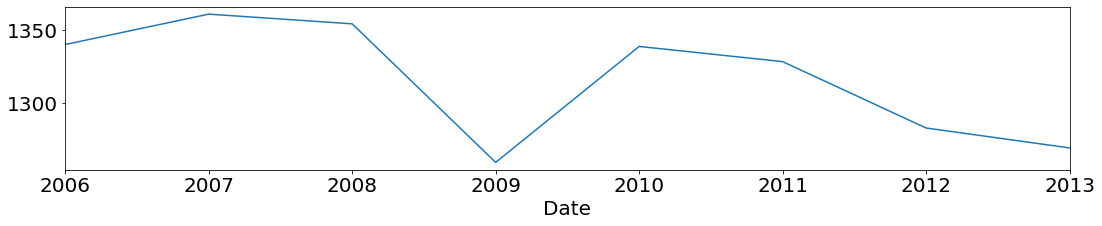

In [92]:
train_power.Consumption.resample('Y').mean().plot()

#### BONUS:
7. Group the consumption data by month and create a boxplot treating the month component as a separate categorical feature.

In [94]:
train_power.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


<AxesSubplot:xlabel='month', ylabel='Consumption'>

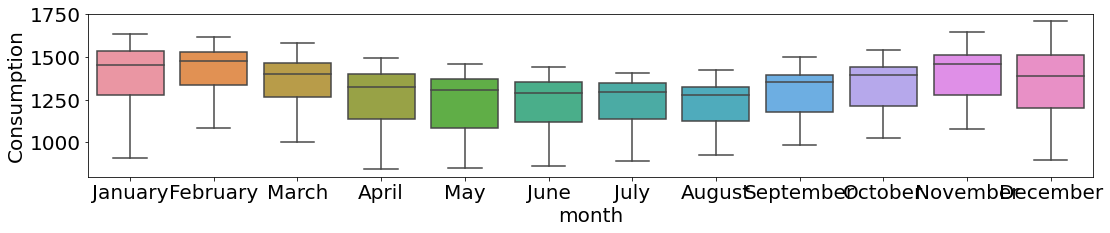

In [95]:
sns.boxplot(x = 'month', y = 'Consumption', data=train_power) 

8. Group the consumption data by weekday and create a boxplot treating the weekday component as a separate categorical feature.

In [97]:
train_power['weekday'] = train_power.index.strftime('%A')
train_power.head()

,Consumption,Wind,Solar,Wind+Solar,month,year,weekday
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,Monday
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,Thursday


<AxesSubplot:xlabel='weekday', ylabel='Consumption'>

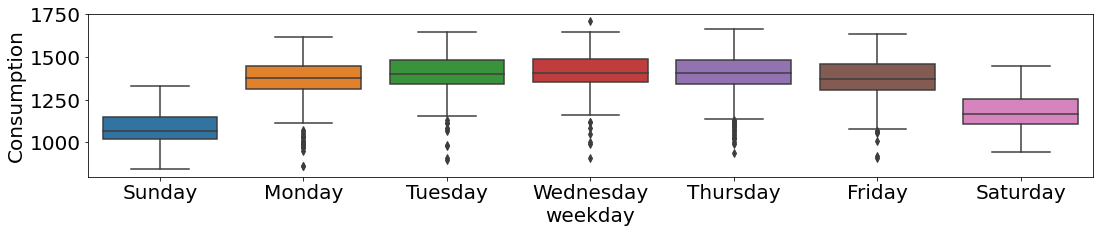

In [98]:
sns.boxplot(x = 'weekday', y = 'Consumption', data=train_power) 

9. Create a subseasonal plot by month of your consumption data. 

In [100]:
table = train_power.Consumption.groupby([train_power.index.year, train_power.index.month]).mean().unstack()
table

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645


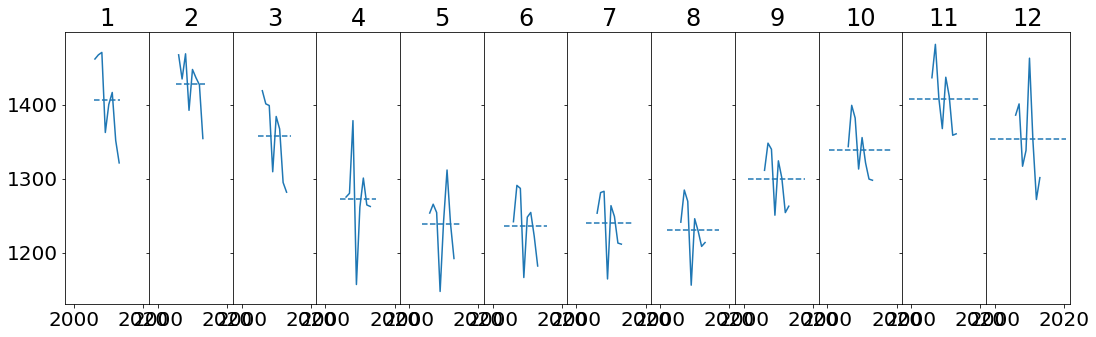

In [106]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.subplots_adjust(wspace=0)

10. Create one or two visualizations that helps answer the follow questions: How does wind production/consumption vary within a year? How does wind production/consumption vary from year to year?

<AxesSubplot:xlabel='Date'>

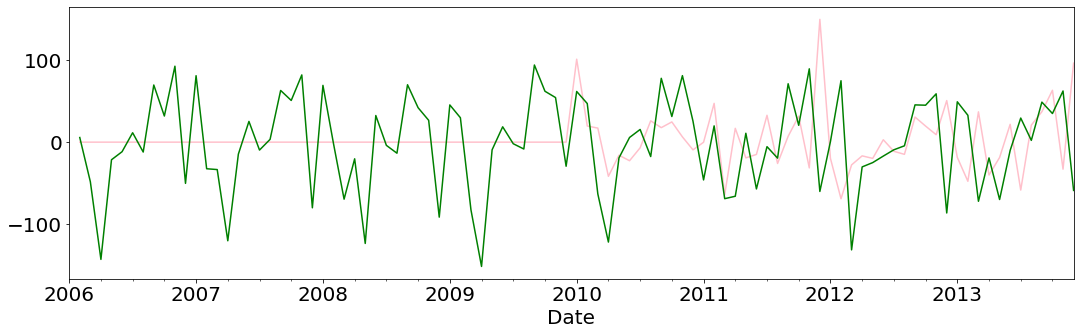

In [116]:
# How does wind production/consumption vary within a year?

train_power.Wind.resample('M').mean().diff().plot(color = 'pink')
train_power.Consumption.resample('M').mean().diff().plot(color = 'green')

<AxesSubplot:xlabel='Date'>

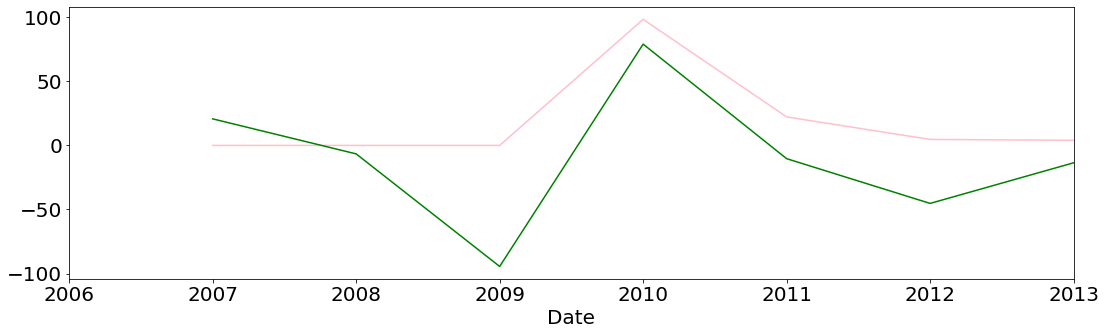

In [114]:
# How does wind production/consumption vary from year to year?

train_power.Wind.resample('Y').mean().diff().plot(color = 'pink')
train_power.Consumption.resample('Y').mean().diff().plot(color = 'green')

11. Create one or two visualizations that helps answer the follow questions: How does solar production/consumption vary within a year? How does solar production/consumption vary from year to year?

<AxesSubplot:xlabel='Date'>

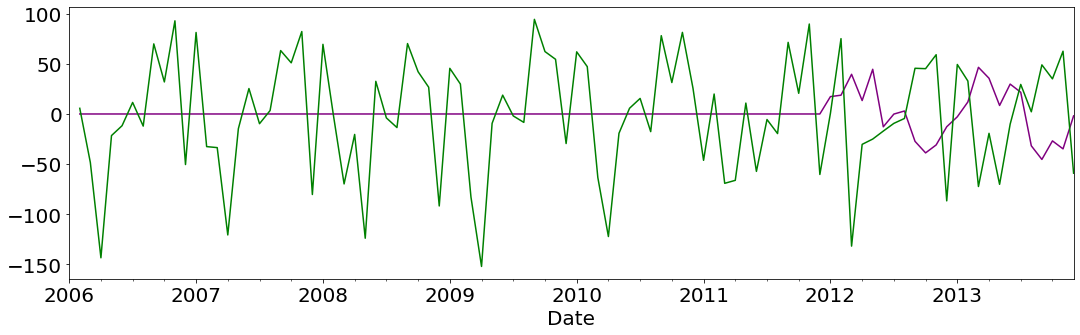

In [115]:
# How does solar production/consumption vary within a year?

train_power.Solar.resample('M').mean().diff().plot(color = 'purple')
train_power.Consumption.resample('M').mean().diff().plot(color = 'green')

<AxesSubplot:xlabel='Date'>

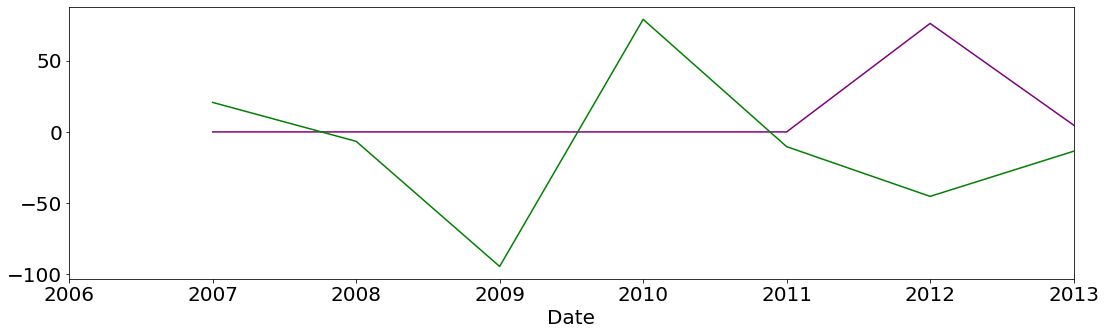

In [117]:
# How does solar production/consumption vary from year to year?

train_power.Solar.resample('Y').mean().diff().plot(color = 'purple')
train_power.Consumption.resample('Y').mean().diff().plot(color = 'green')

12. Plot a time series decomposition for your consumption data and note your takeaways.

<AxesSubplot:xlabel='Date'>

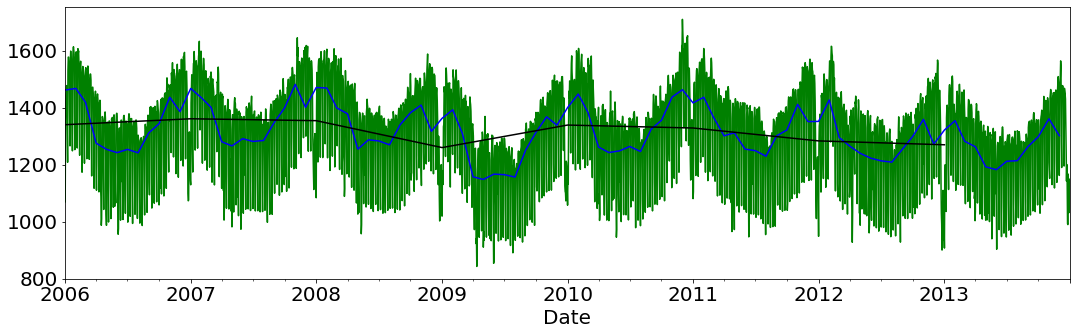

In [120]:
train_power.Consumption.resample('D').mean().plot(color = 'green')
train_power.Consumption.resample('M').mean().plot(color = 'blue')
train_power.Consumption.resample('Y').mean().plot(color = 'black')

13. Create an autocorrelation plot of a weekly resampling of the consumption data.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

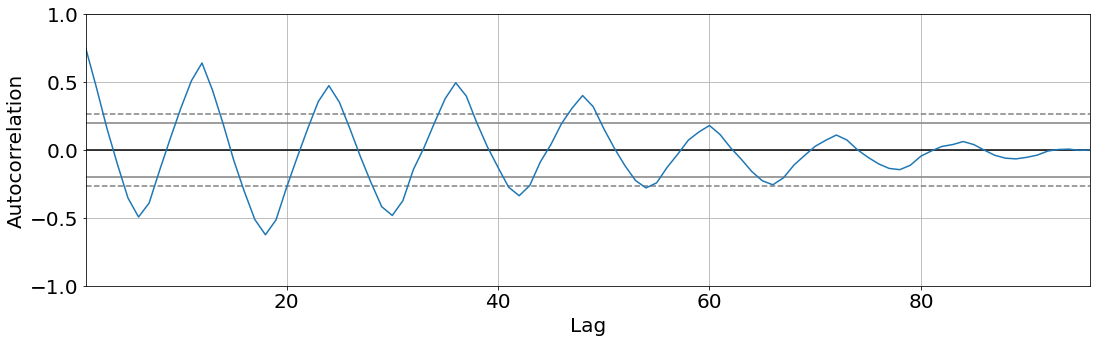

In [123]:
pd.plotting.autocorrelation_plot(train_power.Consumption.resample('M').mean())